# Sensitivity test

In [1]:
notebook_name = "sensitivity_test"

In [2]:
from sensitivity_test import *

In [4]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
# 優先順位を Helvetica → Arial の順に設定（必要なら他のフォントを追加）
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']    

## あらかじめ絞れるパラメータ

### temperature of sea surface of initial evaporation

Nakamura et al. 2008 GRL　Fig. 1より、typicalな　SST frontは5-15度くらい。その周辺でstorm track活動が活発になると考える。 -> 蒸発起源SST

In [5]:
param_fix_dict = {
    "temp_sea_init_list": [5, 10, 15]    ,
    "BOOL_REEVAP": False, # 十分湿っている雲には返らない
    "temp_surf": [0],
    # "BOOL_RESUB": False,
}

## Tuningにより感度が低いと判断されたパラメータ

In [6]:
param_fix_dict["h_air"] = 1
param_fix_dict["temp_air_init_list"] =  [5, 10, 15]
param_fix_dict["surface_wind"] = 6.5
param_fix_dict["ALPHA_MODE"] = "eff"
param_fix_dict["rh_surf"] = 0.75

## 感度実験の必要なパラメータ

- `temp_air_fin`
- `drh`
- `resub_factor`

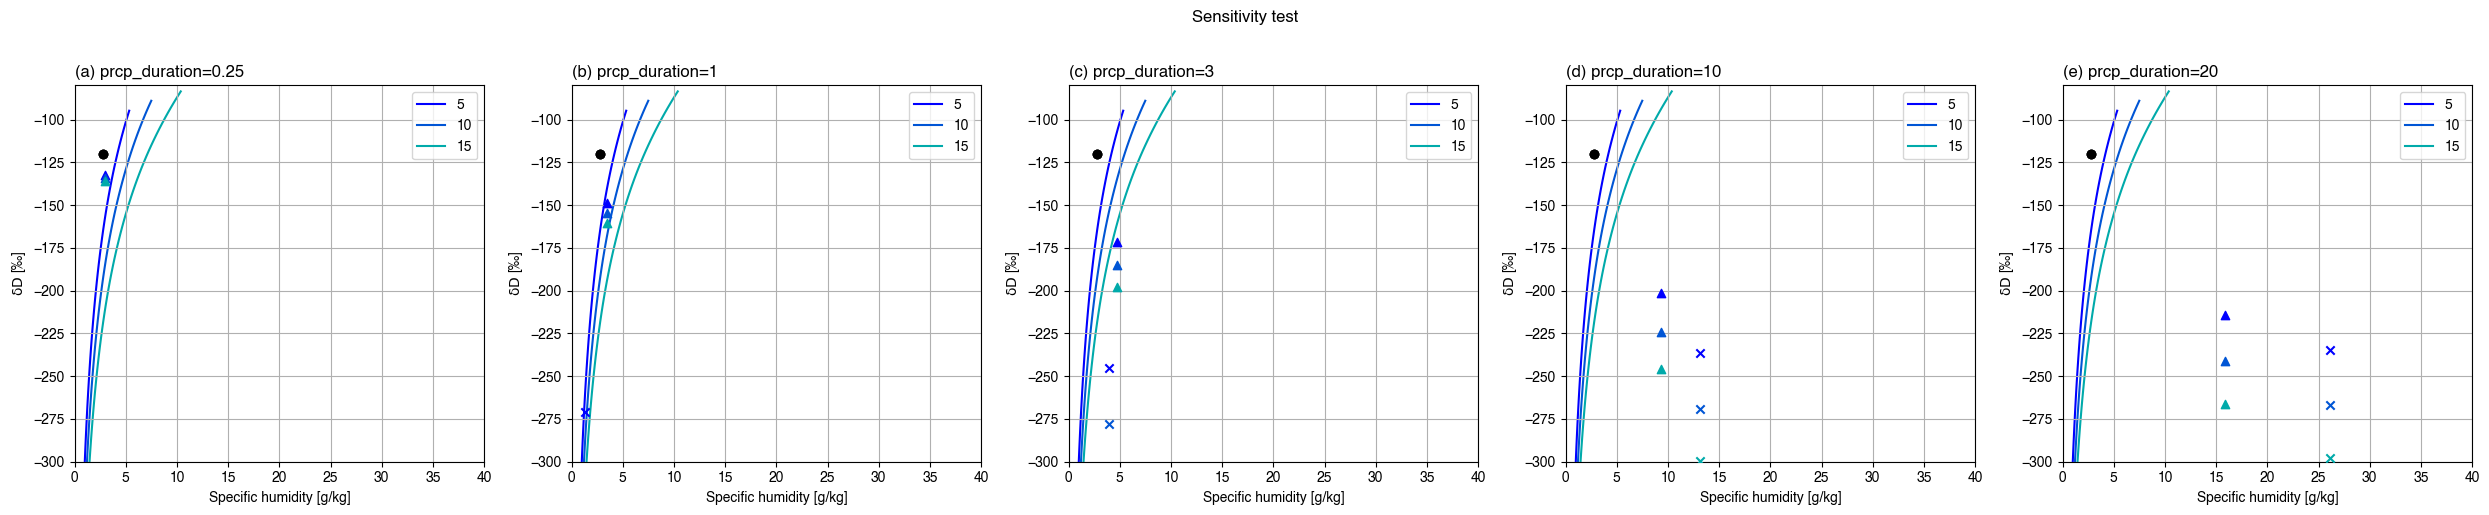

File saved as '/Users/kanon/Work/IsoFracPy/analysis/figures/Sensitivity_test.png'.


In [8]:
param_test_dict = {
    # "temp_air_fin": [-30, -10],
    # "delta_q_surf":[-120,-100],
    # "prcp_perday":[1, 2],
    "prcp_duration":[0.25,1,3,10,20],
    # "resub_factor": [0.1,0.5]
}

fig_title="Sensitivity test"
run_sensitivity_analysis(
    param_test_dict=param_test_dict,
    param_fix_dict=param_fix_dict,
    fig_title=fig_title,
    iso_model_dir=iso_model_dir,
    subplot_hnum_max=6,
    xlim = (0, 40),
    ylim = (-300, -80),
    notebook_name=notebook_name
)

どの高さ(`temp_air_fin`)からふってものがどれくらい水蒸気に帰るか(`drh * f`)がいちばんききそう。
- モデルでは、`temp_air_fin`が低すぎる（あるいは上空で生成される同位体比が低すぎる）
- モデルでは、降水量`rh`が多すぎる
- モデルでは、昇華効率`f`が大きすぎる